In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [9]:
f = open('Москва_2021.txt', "r")
data = []
for line in f:
    line = line.strip()
    if line:  
        number = int(line) 
        data.append(number)
    

In [11]:
data

[23,
 32,
 27,
 26,
 44,
 49,
 63,
 34,
 66,
 66,
 38,
 27,
 28,
 35,
 26,
 46,
 62,
 44,
 22,
 35,
 31,
 31,
 27,
 37,
 32,
 49,
 31,
 22,
 18,
 29,
 30,
 20,
 31,
 18,
 69,
 36,
 28,
 38,
 62,
 25,
 38,
 32,
 31,
 18,
 48,
 38,
 40,
 21,
 25,
 27,
 44,
 45,
 29,
 41,
 24,
 19,
 29,
 67,
 41,
 44,
 25,
 22,
 42,
 40,
 21,
 44,
 29,
 34,
 63,
 32,
 49,
 34,
 35,
 23,
 45,
 26,
 36,
 46,
 36,
 45,
 38,
 31,
 24,
 29,
 41,
 31,
 27,
 41,
 33,
 20,
 45,
 25,
 40,
 41,
 32,
 20,
 41,
 41,
 57,
 47,
 22,
 63,
 21,
 43,
 19,
 30,
 25,
 41,
 44,
 27,
 34,
 33,
 26,
 47,
 19,
 43,
 48,
 30,
 19,
 33,
 36,
 29,
 27,
 36,
 45,
 34,
 20,
 48,
 32,
 20,
 66,
 23,
 48,
 26,
 43,
 26,
 22,
 41,
 19,
 55,
 21,
 43,
 45,
 34,
 25,
 49,
 19,
 35,
 51,
 18,
 34,
 24,
 42,
 19,
 37,
 21,
 31,
 34,
 32,
 47,
 49,
 23,
 35,
 24,
 29,
 48,
 29,
 36,
 34,
 39,
 39,
 25,
 23,
 52,
 31,
 33,
 48,
 35,
 24,
 25,
 28,
 30,
 34,
 34,
 19,
 29,
 39,
 33,
 38,
 25,
 47,
 19,
 31,
 19,
 22,
 27,
 27,
 24,
 38,
 31,


1. Из генеральной совокупности сгенерировать 36 выборок одинакового
объема, для каждой из которых найти выборочную среднюю. Объем
определить по схеме повторной выборки так, чтобы с надежностью γ = 0,95
обеспечить точность оценки математического ожидания δ = 3 года.

In [12]:
gamma = 0.95
delta = 3
t = st.t.ppf((1 + gamma) / 2, len(data))
sigma = np.std(data)

n = int(np.ceil(t**2 * sigma**2 / delta**2))

samples = []
means_of_samples = []
for i in range(36):
    sample = np.random.choice(data, size=n, replace=True)
    samples.append(sample)
    sample_mean = np.mean(sample)
    means_of_samples.append(sample_mean)

print("Объем каждой выборки:", n)
print("Выборочные средние для каждой выборки:", means_of_samples)

Объем каждой выборки: 62
Выборочные средние для каждой выборки: [34.435483870967744, 35.354838709677416, 36.33870967741935, 35.935483870967744, 34.725806451612904, 37.064516129032256, 35.33870967741935, 35.11290322580645, 35.516129032258064, 35.854838709677416, 37.54838709677419, 37.064516129032256, 35.45161290322581, 34.193548387096776, 37.145161290322584, 37.17741935483871, 35.145161290322584, 36.596774193548384, 35.58064516129032, 31.596774193548388, 37.87096774193548, 36.03225806451613, 36.29032258064516, 38.096774193548384, 34.75806451612903, 35.03225806451613, 36.45161290322581, 36.11290322580645, 36.58064516129032, 35.24193548387097, 36.774193548387096, 33.58064516129032, 35.95161290322581, 36.33870967741935, 33.96774193548387, 36.596774193548384]


2. На основании полученных значений выборочных средних построить
интервальный ряд распределения, в котором левая граница – округленное
вниз минимальное значение выборочной средней, правая граница –
округленное вверх максимальное значение выборочной средней, длина
интервала – 1 год. Вычислить относительные частоты, построить
гистограмму.

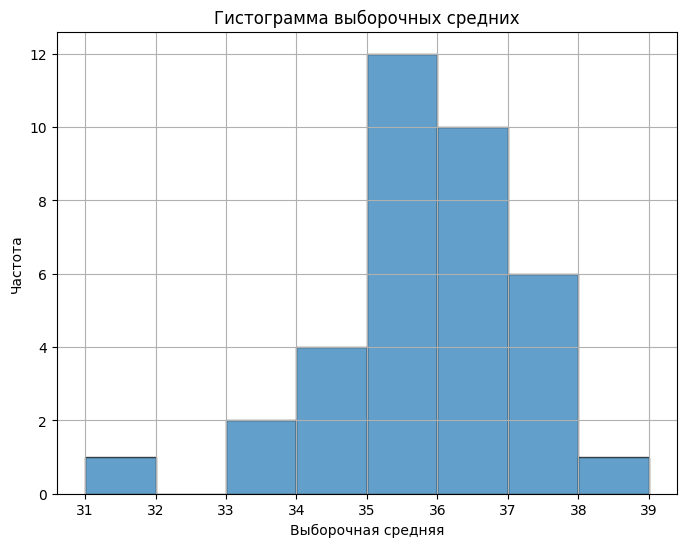

Интервал: [31.0, 32.0], Относительная частота: 0.027777777777777776
Интервал: [32.0, 33.0], Относительная частота: 0.0
Интервал: [33.0, 34.0], Относительная частота: 0.05555555555555555
Интервал: [34.0, 35.0], Относительная частота: 0.1111111111111111
Интервал: [35.0, 36.0], Относительная частота: 0.3333333333333333
Интервал: [36.0, 37.0], Относительная частота: 0.2777777777777778
Интервал: [37.0, 38.0], Относительная частота: 0.16666666666666666
Интервал: [38.0, 39.0], Относительная частота: 0.027777777777777776


In [15]:
min_mean = np.floor(min(means_of_samples))
max_mean = np.ceil(max(means_of_samples))
bins = np.arange(min_mean, max_mean + 1, 1)

hist, bin_edges = np.histogram(means_of_samples, bins=bins, density=False) #hist: Массив с частотами (количество значений, попавших в каждый интервал). Это важная часть, которая показывает, сколько данных попало в каждый бин.bin_edges: Массив с границами интервалов (или “бинсов”). Это массив длиной на 1 больше, чем количество бинов, потому что включает и левую, и правую границы каждого интервала.

relative_frequencies = hist / len(means_of_samples)


plt.figure(figsize=(8, 6))
plt.hist(means_of_samples, bins=bins, edgecolor='black', alpha=0.7, density=False)

plt.title("Гистограмма выборочных средних")
plt.xlabel("Выборочная средняя")
plt.ylabel("Частота")

plt.grid(True)
plt.show()

for i in range(len(bins) - 1):
    print(f"Интервал: [{bins[i]}, {bins[i+1]}], Относительная частота: {relative_frequencies[i]}")

3. Осуществить выравнивание статистического ряда, найдя точечные
оценки нормального распределения методом моментов. Построить кривую
Гаусса, аппроксимировав ею гистограмму частот.

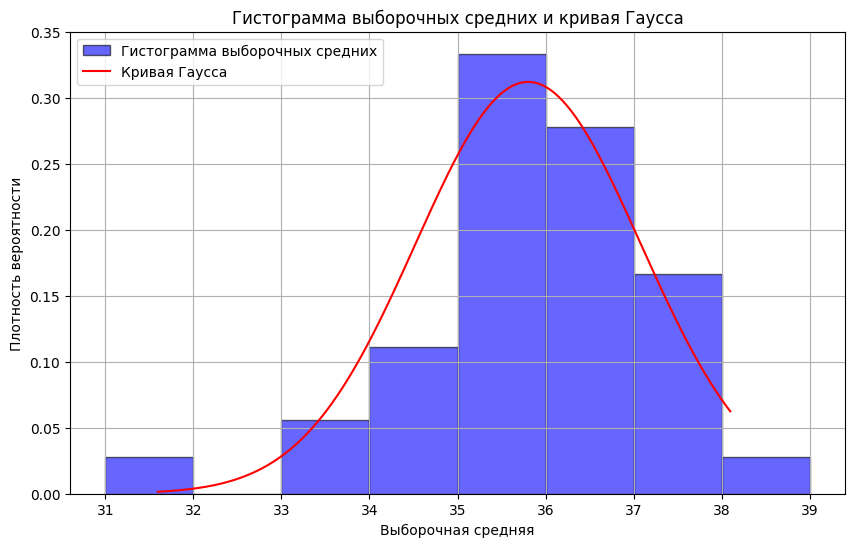

Оценка математического ожидания (mean): 35.80152329749104
Оценка стандартного отклонения (std_dev): 1.2789983557117


In [16]:
mean = np.mean(means_of_samples)
std_dev = np.std(means_of_samples)

hist, bin_edges = np.histogram(means_of_samples, bins=bins, density=True)

x = np.linspace(min(means_of_samples), max(means_of_samples), 1000)
gaussian_curve = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2) #Формула плотности вероятности нормального распределения
plt.figure(figsize=(10, 6))
plt.hist(means_of_samples, bins=bins, density=True, alpha=0.6, color='b', edgecolor='black', label='Гистограмма выборочных средних')
plt.plot(x, gaussian_curve, color='r', label='Кривая Гаусса')

plt.title("Гистограмма выборочных средних и кривая Гаусса")
plt.xlabel("Выборочная средняя")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True)
plt.show()

print(f"Оценка математического ожидания (mean): {mean}")
print(f"Оценка стандартного отклонения (std_dev): {std_dev}")

4. На основании одной из сгенерированных выборок найти
доверительный интервал для оценки математического ожидания случайной
величины «возраст» с надежностью 0,95, предполагая, что среднее
квадратическое отклонение неизвестно.

In [17]:
s = samples[0]
s_mean = np.mean(s)
s_std = np.std(s, ddof=1)
s_std2 = np.std(s)

t = 2.0
delta = t * s_std / np.sqrt(n)
interval = (s_mean - delta, s_mean + delta)
print(f"Выборочная средняя: {s_mean}")
print(f"Выборочное стандартное отклонение: {s_std}")
print(f"Доверительный интервал: {interval}")
print(delta)
print(s_std)
print(s_std2)

Выборочная средняя: 34.435483870967744
Выборочное стандартное отклонение: 10.52961626150211
Доверительный интервал: (31.760958666019665, 37.11000907591582)
2.674525204948078
10.52961626150211
10.444354807574953
